**DS 3010: Applied Data Modeling and Predictive Analysis**

# Lab 05 – Support Vector Machine

Load data and prepare X and y

In [1]:
import numpy as np
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X = X[:, :2]
idx = np.argwhere(y == 2)
X = np.delete(X, idx, axis=0)
y = np.delete(y, idx)
print(X.shape, y.shape)

(100, 2) (100,)


**Task 1:** Use scikit-learn to train your model using SVC with linear kernel. Report the training accuracy. [10 points]

In [2]:
from sklearn.svm import SVC

# create model and train
model = SVC(kernel="linear")
model.fit(X, y)
model.score(X, y)

1.0

**Task 2:** Use matplotlib to visualize the data. Use the first feature as x-axis and the second feature as y-axis and assign different colors for data with different labels. Also plot your model decision boundary and use different colors to highlight support vectors. [10 points]

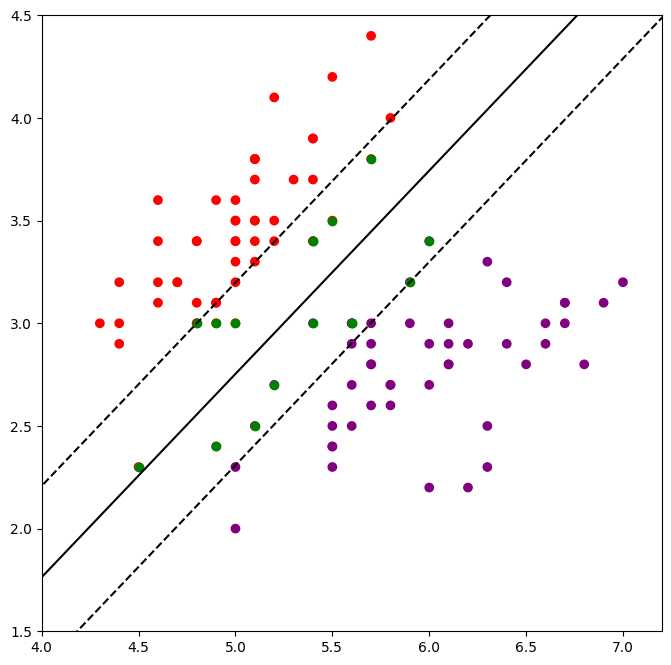

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as mat_colors
from sklearn.inspection import DecisionBoundaryDisplay

# create plot
_, ax = plt.subplots(figsize=(8,8))
x_min, x_max, y_min, y_max = 4, 7.2, 1.5, 4.5
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
common_params = {"estimator": model, "X": X, "ax": ax}

# create boundary lines
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1,0,1],
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
)

# plot points
colors = ['red', 'purple']
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=mat_colors.ListedColormap(colors))
plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], c='green')

**Task 3:** Remove the support vectors (obtained in task 2) from the dataset. Retrain your model and do the same visualization as in Task 2 with new support vectors. [10 points]

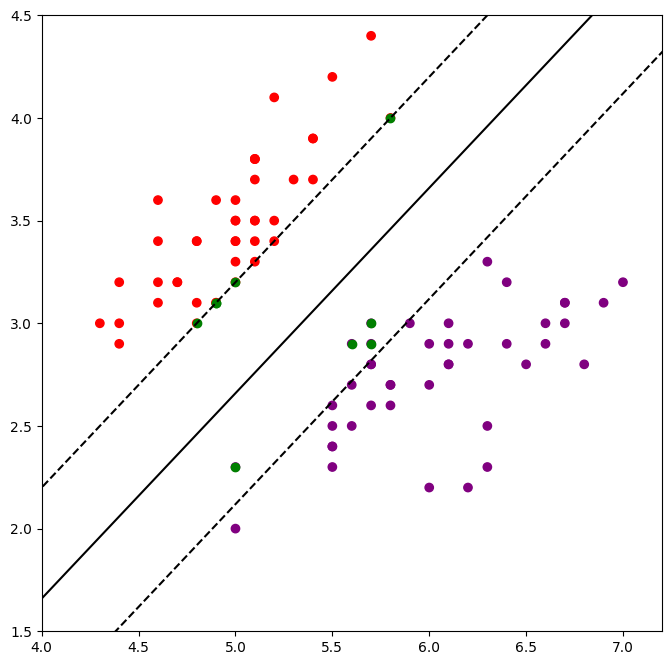

In [6]:
new_X = np.delete(X, model.support_, 0)
new_y = np.delete(y, model.support_, 0)

# create model and train
new_model = SVC(kernel="linear")
new_model.fit(new_X, new_y)
new_model.score(new_X, new_y)

# create plot
_, ax = plt.subplots(figsize=(8,8))
x_min, x_max, y_min, y_max = 4, 7.2, 1.5, 4.5
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
common_params = {"estimator": new_model, "X": new_X, "ax": ax}

# create boundary lines
DecisionBoundaryDisplay.from_estimator(
    **common_params,
    response_method="decision_function",
    plot_method="contour",
    levels=[-1,0,1],
    colors=["k", "k", "k"],
    linestyles=["--", "-", "--"],
)

# plot points
colors = ['red', 'purple']
plt.scatter(new_X[:, 0], new_X[:, 1], c=new_y, cmap=mat_colors.ListedColormap(colors))
plt.scatter(new_model.support_vectors_[:,0], new_model.support_vectors_[:,1], c='green')